General flow of a gradient model.
1. Calculate the slope of the loss (which tells the direction in which we move) i.e the actual val VS predicted val.
2. Update the w and b values (variables) to the closer values to the actual perfect line.
3. Make predictions again to check the newly formed line.
4. Repeat until - i) The difference between the newer and older values is very very small (0.001)
                 ii) Limit the epochs.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=30, n_targets=1)


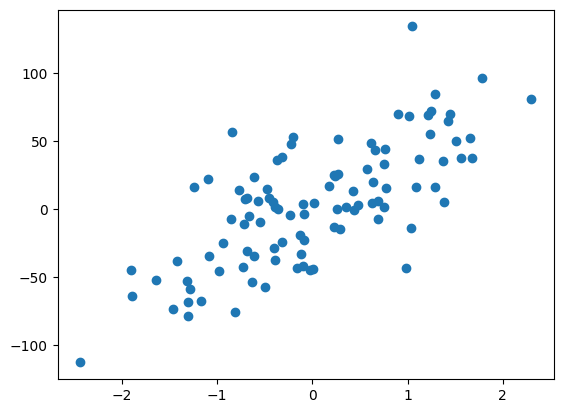

In [20]:
plt.scatter(X, y)

In [21]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X, y)

print("Coefficient: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)

Coefficient:  [33.3975901]
Intercept:  2.9568171810216795


In [22]:
m = 33.3975901

In [32]:
#Making a class to create gradient descent

class GDRegressor():
    def __init__(self, learning_rate, epochs):
        self.m = m
        self.b = -120 #Random value to start with.
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        #Calculate the b using GD.
        for i in range(self.epochs):
            #Calculate the slope (gradient)
            loss_slope_wrt_b = (-2/len(X)) * np.sum(y - (self.m * X.ravel() + self.b))
            loss_slope_wrt_m = (-2/len(X)) * np.sum(X.ravel() * (y - (self.m * X.ravel() + self.b)))
            self.b = self.b - (self.lr * loss_slope_wrt_b)
            self.m = self.m - (self.lr * loss_slope_wrt_m)
            
            print(loss_slope_wrt_b, self.b)
            print(loss_slope_wrt_m, self.m)
        
        print(self.m, self.b)
        

In [71]:
gd = GDRegressor(0.002, 2000)

In [72]:
gd.fit(X, y)

-246.38602575974724 -119.5072279484805
-26.892325971441124 21.431246151942883
-245.39836791834813 -119.01643121264381
-26.774250934387048 21.484794653811658
-244.4146699890194 -118.52760187266577
-26.656686925226815 21.538108027662112
-243.43491609194575 -118.04073204048188
-26.539631756968042 21.59118729117605
-242.4590904110034 -117.55581385965988
-26.423083251893928 21.644033457679836
-241.4871771935039 -117.07283950527287
-26.30703924152421 21.696647536162885
-240.51916074994026 -116.59180118377299
-26.191497566576192 21.749030531296036
-239.55502545373307 -116.11269113286552
-26.076456076926185 21.801183443449887
-238.59475574097854 -115.63550162138357
-25.96191263157076 21.85310726871303
-237.6383361101963 -115.16022494916318
-25.847865098588464 21.904802998910206
-236.68575112207986 -114.68685344691902
-25.734311355101532 21.95627162162041
-235.73698539924652 -114.21537947612052
-25.621249287237816 22.007514120194884
-234.79202362598954 -113.74579542886853
-25.508676790092895 22

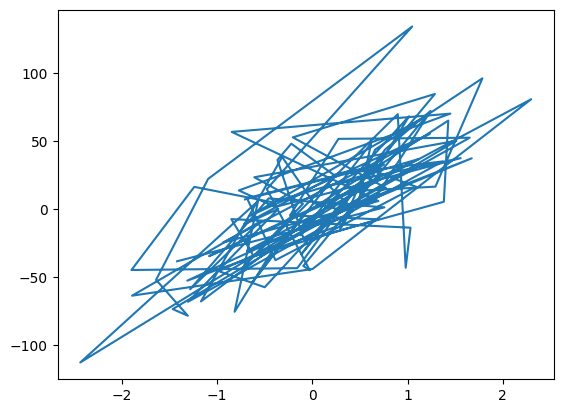

In [73]:
plt.plot(X, y)